In [1]:
import numpy as np
import pandas as pd

1. Load in the appropriate csv file as a pandas dataframe (batting.csv).

In [2]:
df=pd.read_csv('Batting.csv')
OBP=(df.H+df.IBB+df.HBP)/(df.AB+df.IBB+df.HBP+df.SH)
df['OBP']=OBP
PA=df.AB+df.BB+df.HBP+df.SH+df.SF
df['PA']=PA
BA=df.H/df.AB
df['BA']=BA
Age=df.yearID-df.birthYear
df['Age']=Age
df.fillna(0,inplace=True)

2.	Print out the dimensions and info about the dataframe you just created

In [3]:
print('dimensions :{}'.format(df.shape))
df.info()

dimensions :(102816, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 29 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102816 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102816 non-null float64
SB           102816 non-null float64
CS           102816 non-null float64
BB           102816 non-null int64
SO           102816 non-null float64
IBB          102816 non-null float64
HBP          102816 non-null float64
SH           102816 non-null float64
SF           102816 non-null float64
GID

3. How many players have hit 40 or more HRs in one single season? (Number only)

In [4]:
#df.groupby([df['playerID'],df['nameLast'],df['nameFirst'],df['yearID']]).apply(lambda x:x.HR.sum())
#len(df[df.HR>=40])
df1 = pd.DataFrame(df.groupby(['playerID','yearID'])['HR'].agg('sum')).reset_index().sort_values('HR',ascending=False)
len(df1[df1['HR'] >= 40].index)

330

4.	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [44]:
df2=df.groupby([df['nameFirst'],df['nameLast']]).apply(lambda x:sum(x['HR'])).reset_index()
df2.columns.values[2]="HR"
df2[df2['HR']>=600]


,nameFirst,nameLast,HR
473,Alex,Rodriguez,696
924,Babe,Ruth,714
953,Barry,Bonds,762
6575,Frank,Thomas,807
7705,Hank,Aaron,755
9746,Jim,Thome,612
11403,Ken,Griffey,782
15933,Sammy,Sosa,609
18128,Willie,Mays,660


5. How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [6]:
len(df[(df['2B']>=40)&(df['3B']>=10)&(df.H>=200)&(df.HR>=30)].groupby([df['playerID'],df['nameFirst'],df['nameLast']]))

11

6.	How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs 

In [7]:
df2=df[df.SB>=100][['nameFirst','nameLast','yearID','SB']].sort_values(by='SB',ascending=False)
df2[['nameFirst','nameLast','yearID','SB']]
#dict(list(df2[['nameFirst','nameLast','yearID','SB']].groupby(df['playerID'])))

,nameFirst,nameLast,yearID,SB
3667,Hugh,Nicol,1887,138.0
59616,Rickey,Henderson,1982,130.0
3617,Arlie,Latham,1887,129.0
51853,Lou,Brock,1974,118.0
3501,Charlie,Comiskey,1887,117.0
3764,John,Ward,1887,111.0
4278,Billy,Hamilton,1889,111.0
5232,Billy,Hamilton,1891,111.0
62410,Vince,Coleman,1985,110.0
64425,Vince,Coleman,1987,109.0


7.	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [40]:
df2=df[(df.yearID>=1960)&(df.yearID<=1969)]
th=df2.groupby(['playerID','nameFirst','nameLast']).agg({'HR':'sum'},axis='columns').sort_values(by='HR',ascending=False)
th[th.HR>=200]

,,,HR
playerID,nameFirst,nameLast,
killeha01,Harmon,Killebrew,393
aaronha01,Hank,Aaron,375
mayswi01,Willie,Mays,350
robinfr02,Frank,Robinson,316
mccovwi01,Willie,McCovey,300
howarfr01,Frank,Howard,288
cashno01,Norm,Cash,278
bankser01,Ernie,Banks,269
mantlmi01,Mickey,Mantle,256


8.	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [39]:
df4=df.groupby(['playerID','nameFirst','nameLast']).apply(lambda x:sum(x.HR)).reset_index()
df4.columns.values[3]='HR'
df4[['nameFirst','nameLast','HR']].sort_values(by='HR',ascending=False).head(1)

,nameFirst,nameLast,HR
1542,Barry,Bonds,762


9.	Who had the most hits (H) in the 1970s? (Dataframe)

In [38]:
#a=pd.DataFrame(df[(df.yearID==1970)].groupby([df['playerID'],df['yearID']]).H.sum().reset_index())
#a.sort_values(by='H',ascending=False).head(1)
b=df[(df.yearID>=1970)&(df.yearID<1980)]
c=pd.DataFrame(b.groupby(['playerID','nameFirst','nameLast']).H.sum().reset_index())
c.sort_values(by='H',ascending=False).head(1)

,playerID,nameFirst,nameLast,H
1639,rosepe01,Pete,Rose,2045


10.	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [96]:
df1 = df.groupby(['nameFirst','nameLast','yearID'])['PA'].agg('sum').reset_index().sort_values('PA',ascending=False)
df2 = df.groupby(['nameFirst','nameLast','yearID'])['OBP'].agg('mean').reset_index().sort_values('OBP',ascending=False)
df3 = pd.merge(df1,df2,on=['nameFirst','nameLast','yearID'])
df4 = df3[df3['PA'] >= 500].sort_values('OBP',ascending=False)
df4[df4['yearID'] == 1977].head()


,nameFirst,nameLast,yearID,PA,OBP
719,Rod,Carew,1977,694.0,0.404724
455,Dave,Parker,1977,706.0,0.357686
4178,Ted,Simmons,1977,601.0,0.351750
2246,Ken,Singleton,1977,651.0,0.346642
1930,Lyman,Bostock,1977,660.0,0.346535


11.	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [36]:
df[(df.PA>=300)&(df.yearID==2013)][['playerID','nameFirst','nameLast','BA']].sort_values(by='BA',ascending=False).head(8)

,playerID,nameFirst,nameLast,BA
97188,cabremi01,Miguel,Cabrera,0.347748
98062,ramirha01,Hanley,Ramirez,0.345395
97300,cuddymi01,Michael,Cuddyer,0.331288
97825,mauerjo01,Joe,Mauer,0.323596
98293,troutmi01,Mike,Trout,0.322581
97651,johnsch05,Chris,Johnson,0.321012
97437,freemfr01,Freddie,Freeman,0.319419
98043,puigya01,Yasiel,Puig,0.319372


12.	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits) (Top 5)

In [35]:
df2=df[(df.yearID>=1940)&(df.yearID<=1949)]
pd.DataFrame(df2.groupby(['playerID','nameFirst','nameLast']).agg({'H':'sum'},axis='columns').sort_values(by='H',ascending=False).head().reset_index())

,playerID,nameFirst,nameLast,H
0,boudrlo01,Lou,Boudreau,1578
1,elliobo01,Bob,Elliott,1563
2,walkedi02,Dixie,Walker,1512
3,musiast01,Stan,Musial,1432
4,doerrbo01,Bobby,Doerr,1407


13.	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [92]:
k=df[(df.lgID=='AL')|(df.lgID=='NL')].loc[df.groupby(["yearID"])["H"].idxmax()]     
l=k[['playerID','nameFirst','nameLast','yearID','H']].dropna()
l.groupby(['playerID','nameLast','nameFirst']).size().rename('lead_times').reset_index().sort_values('lead_times',ascending=False).head(1)
#l.groupby(['playerID','nameLast','nameFirst']).filter(lambda x:if len(x['playerID'].value_counts())==x.max())


D:\UTD\sem 3\python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,playerID,nameLast,nameFirst,lead_times
20,cobbty01,Cobb,Ty,7


14. Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe

In [33]:
pd.DataFrame(df.groupby(['playerID','nameFirst','nameLast']).G.sum().reset_index()).sort_values('G',ascending=False).head()



,playerID,nameFirst,nameLast,G
14719,rosepe01,Pete,Rose,3562
18728,yastrca01,Carl,Yastrzemski,3308
1,aaronha01,Hank,Aaron,3298
7383,henderi01,Rickey,Henderson,3081
3155,cobbty01,Ty,Cobb,3035


15. How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [16]:
e=df.groupby([df['playerID'],df['nameFirst'],df['nameLast']]).agg({'H':'sum','HR':'sum'})
len(e[(e['H']>=3000)&(e['HR']>=500)])

5

16. How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [17]:
h=df[df['yearID']==1988].agg({'HR':'sum'})
h['HR']

3180

17.	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [18]:
i=df[(df['nameFirst']=='Wade')&(df['nameLast']=='Boggs')&(df['AB']>=500)].sort_values(by='BA',ascending=False).head(3)
i[['nameFirst','nameLast','BA']]

,nameFirst,nameLast,BA
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


18. Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [19]:
j=df[(df['yearID']==1995)&(df['PA']>=400)].sort_values(by='OBP',ascending=False).head(10)
j[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
73578,Edgar,Martinez,0.388476
73327,Tony,Gwynn,0.380952
73776,Mike,Piazza,0.361798
73996,Frank,Thomas,0.354167
72986,Dante,Bichette,0.350340
72963,Derek,Bell,0.348485
73495,Chuck,Knoblauch,0.348457
74063,Larry,Walker,0.341651
73799,Kirby,Puckett,0.339893
73875,Tim,Salmon,0.339450


19. Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs (1 person)

In [20]:
k=pd.DataFrame(df[(df.yearID==1922)|(df.yearID==1925)|(df.yearID==1926)|(df.yearID==1928)].groupby([df['nameFirst'],df['nameLast']]).agg({'3B':'sum'}).reset_index())
k[['nameFirst','nameLast','3B']].sort_values(by='3B',ascending=False).head(1)

,nameFirst,nameLast,3B
237,Curt,Walker,59


20. How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [91]:
df1=pd.DataFrame(df.groupby(['playerID','yearID'])['HR','SB'].agg('sum')).reset_index().sort_values('HR',ascending=False)
df2 = df1[(df1['HR'] >= 30) & (df1['SB'] >= 30)]
len(df2.playerID.unique())

38

21. Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [22]:
l=df[(df.yearID==1986)&(df.AB>=400)].sort_values(by='OBP',ascending=False).head(1)
l[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
63320,Wade,Boggs,0.369565


22. Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [23]:
m=df[(df.yearID==1997)&(df.AB>=400)&(df.lgID=='NL')].sort_values(by='OBP',ascending=False).head(1)
m[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
76562,Larry,Walker,0.395973


23.	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)(yearID for league)

In [70]:
avg=df[df.yearID==2012].groupby(['nameFirst','nameLast']).filter(lambda x:x['AB'].sum()>=500)
#lAvg=lambda x:x[x.HR-x.HR.mean()>0]
avg2=avg[avg.HR>avg.HR.mean()]
avg2[['nameFirst','nameLast','HR']].sort_values('HR',ascending=False).reset_index()

,index,nameFirst,nameLast,HR
0,95768,Miguel,Cabrera,44
1,96114,Josh,Hamilton,43
2,96081,Curtis,Granderson,43
3,95969,Edwin,Encarnacion,42
4,95728,Ryan,Braun,41
5,95952,Adam,Dunn,41
6,95687,Adrian,Beltre,36
7,96971,Josh,Willingham,35
8,95741,Jay,Bruce,34
9,96301,Adam,LaRoche,33


24.	Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [25]:
season=pd.DataFrame(df[df.HR>=50].groupby(['nameFirst','nameLast','yearID','Age']).HR.sum().reset_index())
season.sort_values(by='Age').head(1)

,nameFirst,nameLast,yearID,Age,HR
31,Prince,Fielder,2007,23,50


25.	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [85]:
df1 = df.groupby(['nameFirst','nameLast','Age','yearID'])['HR'].sum().reset_index()
df1['HR_sum'] = df1.groupby(['nameLast','nameFirst'])['HR'].cumsum()
df2=df1.sort_values('Age')
df3 = df2[df2['HR_sum'] >= 300].head(8)
df3.sort_values('yearID').head().drop(['HR','HR_sum'],axis=1)

,nameFirst,nameLast,Age,yearID
49906,Jimmie,Foxx,28,1935
66083,Mel,Ott,28,1937
33738,Frank,Thomas,28,1957
33739,Frank,Thomas,28,1996
58212,Ken,Griffey,28,1997


  Graph total HRs per season using bar graph

In [46]:
import matplotlib.pyplot as plt

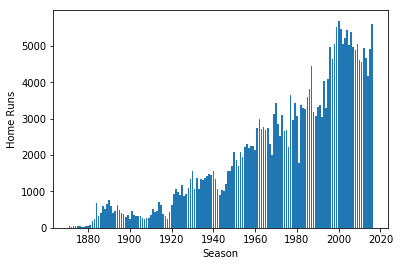

In [47]:
total_hr=df.groupby('yearID').HR.sum().reset_index()
years=df.yearID.unique()
plt.bar(years,total_hr.HR)
plt.xlabel('Season')
plt.ylabel('Home Runs')
plt.show()

Using a line graph please graph the average HRs per AB (think about this) per season

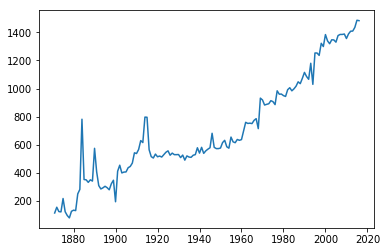

In [72]:
df['Average']=df['AB']/df['HR']
season=df.yearID.unique()
df.fillna(0,inplace=True)
df2=df.groupby('yearID')['Average'].size().reset_index()
plt.plot(season,df2['Average'])